# Linear Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ModelAuto as ma

In [1]:
#!pip install ModelAuto

In [6]:
data = pd.read_csv('/content/car data.csv')

In [7]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [8]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [9]:
x = data.iloc[:,[0,2,3,4,5,6,7]]
y = data.iloc[:,1]

In [10]:
y = y.fillna(y.mean())

In [11]:
pre = ma.Datapreprocess.Preprocessing(x)

Data Preprocessing...
Done!


In [12]:
pre

,Year,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Dealer,Individual,Manual
0,0.733333,0.057109,0.053053,0.0,0,1,1,0,1
1,0.666667,0.099913,0.085085,0.0,1,0,1,0,1
2,0.933333,0.103273,0.012813,0.0,0,1,1,0,1
3,0.533333,0.041504,0.009409,0.0,0,1,1,0,1
4,0.733333,0.070980,0.083984,0.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
296,0.866667,0.122237,0.067043,0.0,1,0,1,0,1
297,0.800000,0.060468,0.119119,0.0,0,1,1,0,1
298,0.400000,0.115735,0.175043,0.0,0,1,1,0,1
299,0.933333,0.131990,0.017017,0.0,1,0,1,0,1


Feature Analysing...
. . . . . . . . . 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


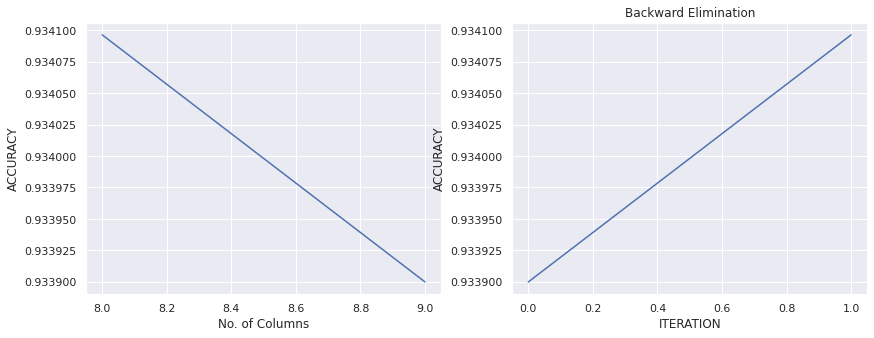

In [13]:
selected = ma.FeatureSelection.backwardElimination(pre,y)

In [14]:
selected.shape

(301, 7)

Building Model From Scratch

In [15]:
import torch as th

In [16]:
def loss(pred,target):
  '''
    loss = Sum( (pred - target)^2 )/ len( train dataset )
  '''
  diff = pred - target

  sum = th.sum(diff*diff)
 
  return sum/diff.numel()

def model(x):
  return x @ weights.t() +intercept


In [17]:
inputs = th.from_numpy(selected.values).float()
target = th.from_numpy(y.values).float()

In [ ]:
inputs.dtype

torch.float32

In [ ]:
weights = th.randn(inputs.shape[1],requires_grad=True).float()
intercept = th.randn(1,requires_grad=True).float()

In [ ]:
pred = model(inputs)

In [ ]:
Loss = loss(pred,target)

In [ ]:
Loss

tensor(57.1898, grad_fn=<DivBackward0>)

In [ ]:
lr_rate = 0.001

In [ ]:
weights.grad

In [ ]:
Loss.backward()
with th.no_grad(): # This is to tell pytorch we should not change the gradients while we are updating the weights nd biases
  weights.sub_(lr_rate*weights.grad)
  intercept.sub_(lr_rate*intercept.grad)
  # weights = th.tensor(weights - lr_rate*weights.grad,requires_grad=True)
  # intercept = th.tensor(intercept - lr_rate*intercept.grad,requires_grad=True)
  weights.grad.zero_()
  intercept.grad.zero_()

In [ ]:
pred = model(inputs)
Loss = loss(pred,target)
#Loss.backward()
Loss

tensor(56.9606, grad_fn=<DivBackward0>)

In [ ]:
65.5139,

(65.5139,)

In [ ]:
th.tensor(weights,requires_grad=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([ 0.0701, -1.1116,  0.3575,  2.2786,  0.2013,  2.2752, -0.5098],
       requires_grad=True)

In [ ]:
target.shape

torch.Size([301])

In [ ]:
# Clubbing All of them Together

In [73]:
class LinearRegression:

  def __init__(self,input,target):
    self.input = th.from_numpy(np.array(input)).float()
    self.target = th.from_numpy(np.array(target)).float()
    self.weights = th.rand(self.input.shape[1],requires_grad=True).float()
    self.intercept = th.rand(1,requires_grad=True).float()
    self.costs = []

 

  def loss(self,pred,target):
    diff = pred - target
    sum = th.sum(diff*diff)
    return sum/diff.numel()

  def model(self,epochs,lr_rate=0.001):

    for i in range(epochs):
      # Getting the equation based on calculated Weight nd intercept
      pred = self.input @ self.weights.t() + self.intercept
      # Getting the loss 
      Loss = loss(pred,self.target)
      self.costs.append(Loss)
      # Applying Gradient Decent and Updating Weights nd Intercept
      Loss.backward()
      with th.no_grad():
        self.weights.sub_(lr_rate*self.weights.grad)
        self.intercept.sub_(lr_rate*self.intercept.grad)
        # Assigning Gradinets back to zero
        self.weights.grad.zero_()
        self.intercept.grad.zero_()

    print('losss :',Loss)
    pred = self.input @ self.weights.t() + self.intercept
    accuacy = self.accuracy(self.target,pred)
    print('Accuracy : ',accuacy.detach().numpy()*100,"%")
    return (pred,self.target)

  def accuracy(self,target,pred):
    return 1 - (th.sum(th.square(target - pred))/(th.sum(th.square(target-th.mean(target)))))

 

  def cost_graph(self):
    fig = plt.figure(figsize=(20,8))
    x = np.linspace(0,len(self.costs),len(self.costs))
    plt.scatter(np.array(x),np.array(self.costs))
    plt.show()

      



In [74]:
lr = LinearRegression(selected,target)

losss : tensor(3.0366, grad_fn=<DivBackward0>)
Accuracy :  88.19620013237 %


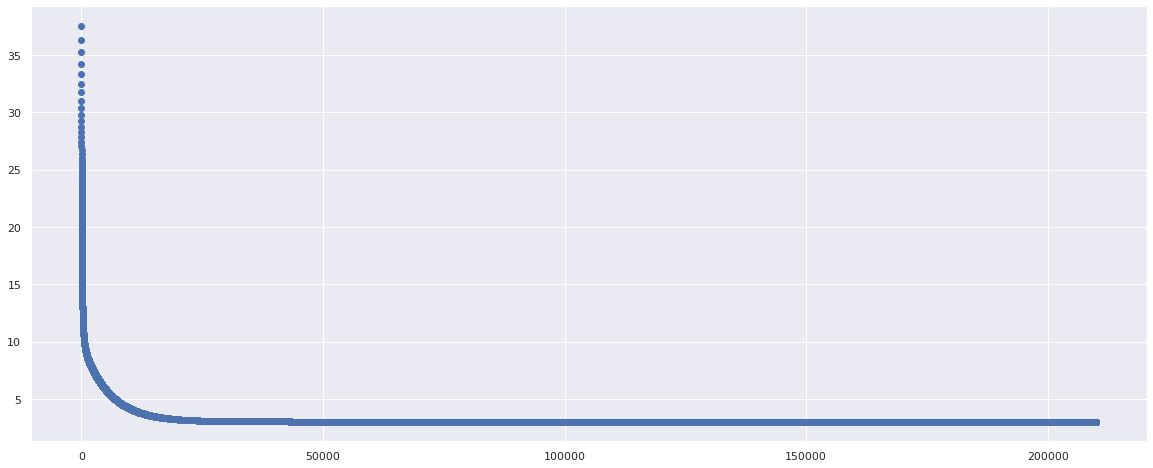

In [92]:
p,t=lr.model(epochs=30000,lr_rate=0.00001)
lr.cost_graph()

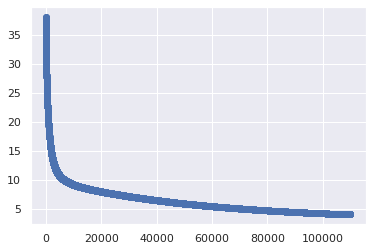

In [ ]:
lr.cost_graph()

# Building the Linear Regresison using Inbuilt Methods

In [ ]:
import torch.nn.functional as F
import torch.nn as nn 

class linearRegressio(nn.Module):

  def __init__(self,inputsize,targetsize):
    #super().__init__()
    self.linmodel = nn.Linear(inputsize,targetsize)
    self.costs = []
  def forward(self,input):
    return self.linmodel(input)

  def dataset(self,input,target):
    return th.utils.data.TensorDataset(input,target)
  
  def loss_func(self,pred,target):
    return F.mse_loss(pred.reshape((len(pred))),target)
  
  def accuracy(self,target,pred):
    return 1 - (th.sum(th.square(target - pred))/(th.sum(th.square(target-th.mean(target)))))

  def cost_graph(self):
    x = np.linspace(0,len(self.costs),len(self.costs))
    plt.scatter(np.array(x),np.array(self.costs))
    plt.show()

  def fit(self,input,target,epoch,lr_rate = 0.01,batch_size=10,shuffle=False):
    # Loading Dataset
    self.costs = []
    train_data = self.dataset(input,target)
    train_data = th.utils.data.DataLoader(train_data,batch_size,shuffle=shuffle)
    # model
    opt = th.optim.SGD(self.linmodel.parameters(),lr=lr_rate)
    for i in range(epoch):
      for inputx,inputy in train_data:
        print('Data : ',inputx)
        print('D2 : ',inputy)
        break
        pred = self.forward(inputx)
        # loss func
        loss =  self.loss_func(pred,inputy)
        print('Loss : ',loss)
        # adding optamizer
        loss.backward()
        opt.step()
        # resting to zero
        opt.zero_grad()
      break
      self.costs.append(loss)
      print('===================\n')
    pred = self.forward(input)
    print("Accuracy ==> : ",self.accuracy(target,pred))

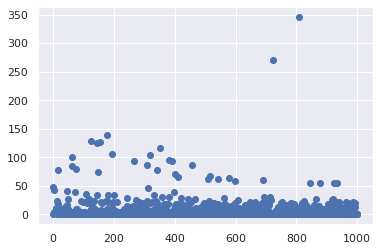

In [ ]:
lr.cost_graph()

In [ ]:
lr.accuracy()

In [95]:
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F

In [ ]:
train = TensorDataset(inputs,target)

In [96]:
from sklearn.metrics import r2_score
class test(nn.Module):
  
  def __init__(self,inputsize,targetsize):
    super().__init__()
    self.model = nn.Linear(inputsize,targetsize)
    self.cost = []

  def forward(self,input):
    return self.model(input)
  
  def loss_func(self,pred,target):
    return F.mse_loss(pred.reshape((len(pred))),target)

  def accuracy(self,target,pred):
    return r2_score(target.detach().numpy(),pred.detach().numpy()) # 1 - (th.sum(th.square(target - pred))/(th.sum(th.square(target-th.mean(target)))))

  def cost_graph(self):
    x = np.linspace(0,len(self.cost),len(self.cost))
    plt.scatter(np.array(x),np.array(self.cost))
    plt.show()

  def fit(self,input,target,epoch,lr_rate=0.01):
    
    train = TensorDataset(input,target)
    train = DataLoader(train,batch_size=10)
    self.opt = th.optim.SGD(self.model.parameters(),lr_rate)

    for i in range(epoch):
      for tx,ty in train:
          pred = self.forward(input)
          loss = self.loss_func(pred,target)
          #print('Loss : ',loss)
          loss.backward()
          self.opt.step()
          self.opt.zero_grad()
          self.cost.append(loss)
 
    pred = self.forward(input)
    #print('Pred : ',pred)
    print('acc :',self.accuracy(target,pred))
    return pred
    

In [99]:
obj = test(inputs.shape[1],1)
res = obj.fit(inputs,target,10000)

acc : 0.8819619121965491


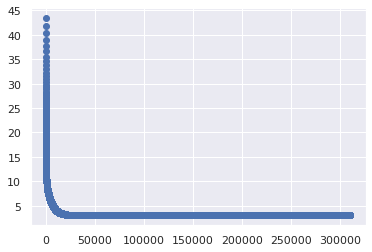

In [100]:
obj.cost_graph()